<a href="https://colab.research.google.com/github/Antikadas1/Kaggle_Challenges/blob/main/Indian_Premier_League_Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Link to kaggle challenge
#you can find more information about the data there 


https://www.kaggle.com/manasgarg/ipl?select=matches.csv

In [ ]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.graph_objects as go

In [ ]:
#mount google drive
from google.colab import drive
drive.mount("/content/MyDrive")


Mounted at /content/MyDrive


In [ ]:
#define the path of my data folder inside google drive
path="/content/MyDrive/MyDrive/Dataset"
match=pd.read_csv(os.path.join(path,'matches.csv'))
delivery=pd.read_csv(os.path.join(path,'deliveries.csv'))
indian_cities=pd.read_csv(os.path.join(path,"indian_cities.csv"))

# Data Analysis on match.csv
##### 1) Each year how many matches were held
##### 2) Number of matches won by each team
##### 3) Number of matches won by each team at their home ground
##### 4) Which team won highest number of matches
##### 5) Does the highest number of winning matches team won the Final -- ** for that we would need one extra information that is who is the winner of each year from 2006 to 2017
##### 6) Every season which player won the highest man of the match from each team
##### 7) Do analysis if batting/fielding first has an effect on winning
##### 8) number of teams played each season
##### 9) Duration of all seasons in months

In [ ]:
#create a dataframe  IPL Winners List from 2008-2017
ipl_final_winner=pd.DataFrame({"season":sorted(set(match["season"])),"winner Team":["Rajasthan Royals","Sunrisers Hyderabad","Chennai Super Kings","Chennai Super Kings","Kolkata Knight Riders","Mumbai Indians","Kolkata Knight Riders","Mumbai Indians","Sunrisers Hyderabad","Mumbai Indians"]})

In [ ]:
#get some information about match csv
#get column names 
col_list_match=list(match.columns)
print (len(col_list_match))
col_list_match
#col and rows info
match


18


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


In [ ]:
#drop unnecessary cols
match["umpire3"].isnull().sum()
match=match.drop(columns=["umpire3","dl_applied"])

#there replace Rising Pune Supergiants with Rising Pune Supergiant as they both are same team but "s" is the entry error
match.replace("Rising Pune Supergiants","Rising Pune Supergiant",inplace=True)

In [ ]:
# *** important note "Sunrisers Hyderabad" and "Deccan Chargers" are the same team only in season2 the name was different
#so for the purpose of smooth analysis I am replacing the the name "Deccan Chargers" with Sunrisers Hyderabad
#it will help to find out home ground.
match.replace("Deccan Chargers","Sunrisers Hyderabad",inplace=True)

In [ ]:
match

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan


## 1)  Each year how many matches were held

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
season_name- 2008 : count of total matches : 58
season_name- 2009 : count of total matches : 57
season_name- 2010 : count of total matches : 60
season_name- 2011 : count of total matches : 73
season_name- 2012 : count of total matches : 74
season_name- 2013 : count of total matches : 76
season_name- 2014 : count of total matches : 60
season_name- 2015 : count of total matches : 59
season_name- 2016 : count of total matches : 60
season_name- 2017 : count of total matches : 59


<BarContainer object of 10 artists>

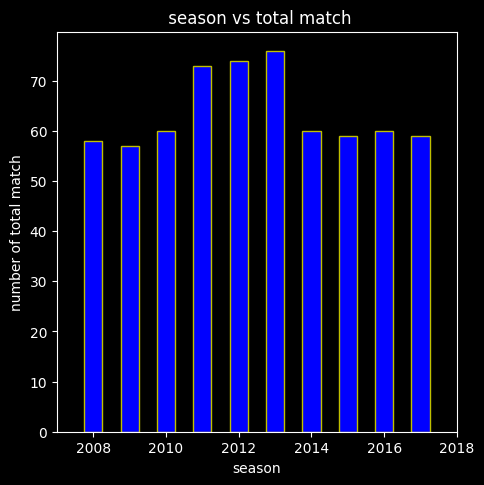

In [ ]:
# 1) Each year how many matches were held -- calculation
name_unique_season=sorted(set(match["season"]))
name_of_teams=sorted(set(match["team1"]))
print (name_unique_season)

count_of_total_matches=[]
for i in name_unique_season:
  count_of_total_matches.append((list(match["season"])).count(i))
  print ("season_name-",i,":","count of total matches :",(list(match["season"])).count(i))

# 1) Each year how many matches were held -- visualization
plt.style.available
plt.style.use('dark_background')
fig=plt.figure(figsize=(8,8),dpi=100)
axes=fig.add_axes([0.2,0.2,0.5,0.5])
axes.set_xlabel("season")
axes.set_ylabel("number of total match")
axes.set_title(" season vs total match")
axes.set_xlim(2007,2018)
axes.bar(name_unique_season,count_of_total_matches,color="blue",edgecolor="y",width=0.5)

In [ ]:
print (name_of_teams)

['Chennai Super Kings', 'Delhi Daredevils', 'Gujarat Lions', 'Kings XI Punjab', 'Kochi Tuskers Kerala', 'Kolkata Knight Riders', 'Mumbai Indians', 'Pune Warriors', 'Rajasthan Royals', 'Rising Pune Supergiant', 'Royal Challengers Bangalore', 'Sunrisers Hyderabad']


## 2) Number of matches won by each team


In [ ]:

#Filter out the data for each season and check Number of matches won by each team
season1=match[match["season"]==2008]
season2=match[match["season"]==2009]
season3=match[match["season"]==2010]
season4=match[match["season"]==2011]
season5=match[match["season"]==2012]
season6=match[match["season"]==2013]
season7=match[match["season"]==2014]
season8=match[match["season"]==2015]
season9=match[match["season"]==2016]
season10=match[match["season"]==2017]
list_season=[season1,season2,season3,season4,season5,season6,season7,season8,season9,season10]

def max_matches_won(name_of_teams,list_season,*arg):
  season=[]
  team_name=[]
  max_win_count=[]
  team=""
  
  for s in list_season:
    max_win=0

    for name in name_of_teams:
      number_of_wins=list(s["winner"]).count(name)
      if number_of_wins>max_win:
        max_win=number_of_wins
        season_year=str(set(list(s["season"])))
        team=name
    season.append(season_year)
    team_name.append(team)
    max_win_count.append(max_win)
  return season,team_name,max_win_count

season,team_name,max_win_count=max_matches_won(name_of_teams,list_season)   
      

In [ ]:
#create a table to show each season maxmimum number of wins by team
fig=go.Figure(data=[go.Table(
    header=dict(values=['season', 'team','Highest winning match count',"season winner"],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[season, # 1st column
                       team_name,# 2nd column
                       max_win_count,
                       list(ipl_final_winner["winner Team"])], #3rd column

               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
])

fig.update_layout(width=500, height=500)
fig.show()


## 3) Number of matches won by each team at their home ground each season

#### ** point to be noted that few seasons were played outside india (or few matches in india + other countiriesin those cases teams dont have homeground ,we will ignore them




In [ ]:
indian_cities_names=list(indian_cities["City"])
missing_city=[]
#few cities are missing in indian city csv file which exists in match.csv we will add those cities in indian city list
for city in set(list(match["city"])):
  if city not in indian_cities_names:
    missing_city.append(city)
    # print (missing_city)

# once you have the missing city list I removed the cities which were not part of india manuaaly
missing_city=[
 'Kolkata',
 'Kanpur',
 'Chandigarh',
 'Visakhapatnam',
 'Bangalore',
 'Dharamsala',
 'Durban',
 'Nagpur']
 
indian_cities_names.extend(missing_city)
seasons_played_in_india=[]
seasons_not_played_in_india=[]
for season in list_season:
  l=[]
  for city in season["city"]:
    if city in indian_cities_names:
      l.append(city)
    
  if len(l)==len(season):
    print (list(season["season"])[0],"all the matches were played in india")
    seasons_played_in_india.append(list(season["season"])[0])
  else:
    print (list(season["season"])[0],"all the matches were not played in india")

    seasons_not_played_in_india.append(list(season["season"])[0])
print (f"seasons played in india {seasons_played_in_india}")

2008 all the matches were played in india
2009 all the matches were not played in india
2010 all the matches were played in india
2011 all the matches were played in india
2012 all the matches were played in india
2013 all the matches were played in india
2014 all the matches were not played in india
2015 all the matches were played in india
2016 all the matches were played in india
2017 all the matches were played in india
seasons played in india [2008, 2010, 2011, 2012, 2013, 2015, 2016, 2017]


In [ ]:
#seasons played in india [2008, 2010, 2011, 2012, 2013, 2015, 2016, 2017]
#replace the value with corresposding dataframe
seasons_not_played_in_india=[season1,season3,season4,season5,season6,season8,season9,season10]


In [ ]:
number_of_matches_won=[]
number_of_matches_won_in_home_ground=[]
team_name_list=[]

for teams in name_of_teams:
  c_win=0
  c_win_home_ground=0
  for i in range(len(season1["winner"])):
    # print (list(season1["winner"])[i])
    # print (teams)
    if teams==list(season1["winner"])[i]:
      c_win=c_win+1
      list_split=teams.split(" ")

      if list(season1["city"])[i] in list_split:
        c_win_home_ground=c_win_home_ground+1
  team_name_list.append(teams)
  number_of_matches_won_in_home_ground.append(c_win_home_ground)
  number_of_matches_won.append(c_win)

  
  home_ground_win_df=pd.DataFrame({"team name":team_name_list,"number of win":number_of_matches_won,"home ground win":number_of_matches_won_in_home_ground})
# ******************************************************************************************
### update ********** the home ground analysis is incorrect as the name of the teams not always
#colides with city, and if you consider vanue, for different seasons the homeground for different teams
#were different
#find the link here for information on homeground
# https://en.wikipedia.org/wiki/List_of_Indian_Premier_League_venues

# I am working on optimized solution of homeground analysis


In [ ]:
home_ground_win_df

,team name,number of win,home ground win
0,Chennai Super Kings,9,3
1,Delhi Daredevils,7,4
2,Gujarat Lions,0,0
3,Kings XI Punjab,10,0
4,Kochi Tuskers Kerala,0,0
5,Kolkata Knight Riders,6,4
6,Mumbai Indians,7,4
7,Pune Warriors,0,0
8,Rajasthan Royals,13,0
9,Rising Pune Supergiant,0,0


# Top 3 Man of the match of each season

In [187]:
#pom=ipl matches
def top_three_pom(season):
  count_man_of_the_match=[]
  player_name=[]
  for players in set(list(season["player_of_match"])):
    player_name.append(players)
    count_man_of_the_match.append(list(season["player_of_match"]).count(players))
  man_of_the_match=pd.DataFrame({"players name":player_name,"man of the match":count_man_of_the_match})
  man_of_the_match=man_of_the_match.sort_values("man of the match",ascending=False)
  # print (man_of_the_match.head(3))

  # top 3 man of the match
  fig=go.Figure(data=[go.Table(
      header=dict(values=["player name","man of the matches"],
                  line_color='darkslategray',
                  fill_color='yellow',
                  align='right'),
      cells=dict(values=[list(man_of_the_match["players name"])[:5], # 1st column
                        list(man_of_the_match["man of the match"])[:5],# 2nd column
                      ],
                line_color='black',
                fill_color='cyan',
                align='right'))
  ])

  fig.update_layout(width=300, height=400)
  fig.show()


In [188]:
  print ("Highest man of the match of all seasons from 2007 to 2017")
  top_three_pom(match)

Highest man of the match of all seasons from 2007 to 2017


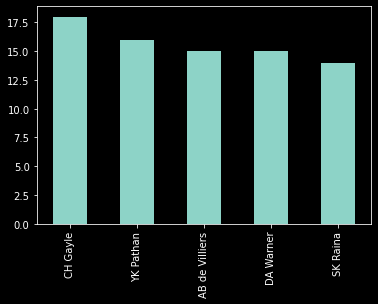

In [189]:
#Bar graph
match['player_of_match'].value_counts()[:5].plot(kind = 'bar')


In [190]:
for season in list_season:
  print ("Highest man of the match of each season :",list(season["season"])[0])
  top_three_pom(season)

Highest man of the match of each season : 2008


Highest man of the match of each season : 2009


Highest man of the match of each season : 2010


Highest man of the match of each season : 2011


Highest man of the match of each season : 2012


Highest man of the match of each season : 2013


Highest man of the match of each season : 2014


Highest man of the match of each season : 2015


Highest man of the match of each season : 2016


Highest man of the match of each season : 2017


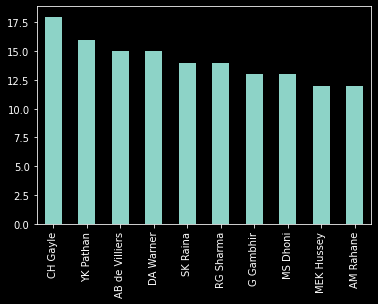

In [185]:
match['player_of_match'].value_counts()[:10].plot(kind = 'bar')


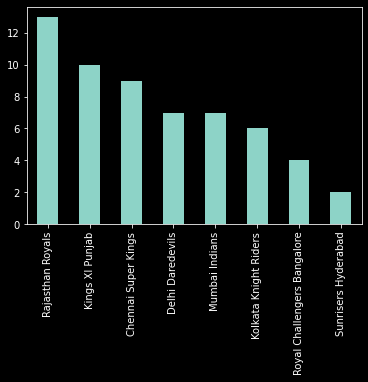

In [195]:
season1["winner"].value_counts().plot(kind="bar")